In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score,KFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [82]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
# Supervised Learning: Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

LinearRegression()

In [84]:
# Supervised Learning: Logistic Regression
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [85]:
# K-fold Cross-Validation with Decision Tree
kf = KFold(n_splits=5, shuffle=True, random_state=42)
tree_model = DecisionTreeClassifier()
tree_cv_score = cross_val_score(tree_model, X, y, cv=kf)
print("Cross-Validation Accuracy (Decision Tree):",
tree_cv_score.mean())

Cross-Validation Accuracy (Decision Tree): 0.9533333333333335


In [87]:
# Unsupervised Learning: K-Means Clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_model.fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [88]:
# Evaluation: Silhouette Score
silhouette_avg = silhouette_score(X_scaled, kmeans_model.labels_)
print("Silhouette Score for K-Means Clustering:", silhouette_avg)

Silhouette Score for K-Means Clustering: 0.45994823920518635


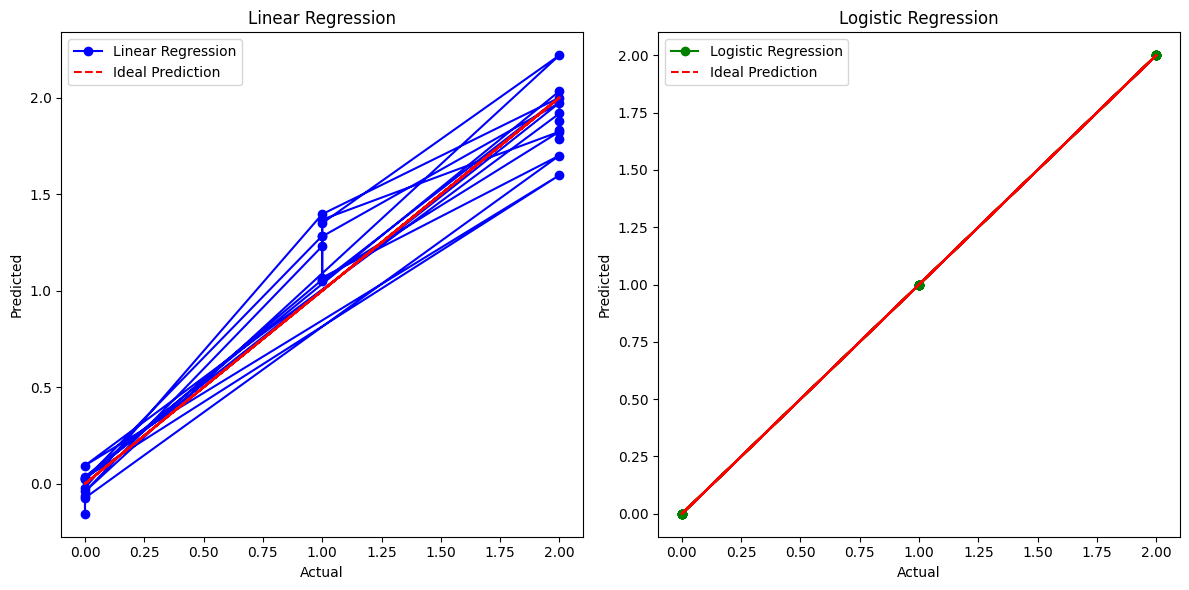

In [89]:
# Plot results
plt.figure(figsize=(12, 6))
# Plot for Linear Regression
plt.subplot(1, 2, 1)
plt.plot(y_test, linear_reg_model.predict(X_test), 'bo-', label='Linear Regression')
plt.plot(y_test, y_test, 'r--', label='Ideal Prediction')
plt.title("Linear Regression")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
# Plot for Logistic Regression
plt.subplot(1, 2, 2)
plt.plot(y_test, logreg_model.predict(X_test), 'go-', label='Logistic Regression')
plt.plot(y_test, y_test, 'r--', label='Ideal Prediction')
plt.title("Logistic Regression")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.tight_layout()
plt.show()